<a href="https://colab.research.google.com/github/dung18520632/CS114.K21/blob/master/Round3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# I. Lấy dữ liệu

# 1.Tải file data.csv lên Drive.

In [0]:
time_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv', names=["size", "time"])

Trực quan hóa dữ liệu. Vì dữ liệu dạng tuyến tính nên chọn model Linear Regression

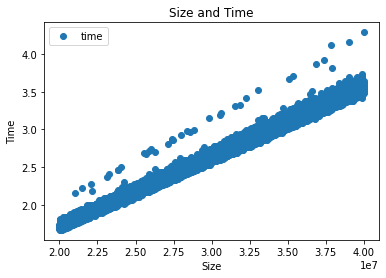

In [12]:
time_df.plot (x = 'size', y = 'time', style = 'o')
plt.title ( 'Size and Time')   
plt.xlabel ( 'Size')   
plt.ylabel ( 'Time') 
plt.show()

# II.Chọn Model là linear regression

1.Trước khi chia dữ liệu thành tập dữ liệu để train - test, chúng ta cần chia dữ liệu thành hai giá trị : giá trị đích và giá trị dự báo.
X=All other features
# Y=Predict time

In [3]:
size = time_df['size'].astype(float)
X=time_df.drop('time', axis = 1)
Y = time_df['time']
print(time_df.head(5))

      size      time
0  6083695  0.521842
1  1954367  0.152648
2  3734185  0.298548
3  5839301  0.460480
4  6343427  0.527977


# 2.Chia tập dữ liệu thành 2 phần. 80% để train và 20% để test

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print(X_test[:5])


          size
15937  2661626
26460  7548278
33134  2316651
25574  1977028
31592  6337478


In [5]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)
Y_pred = lm.predict(X_test)
result = lm.score(X_test, y_test)
print('result',result)
print('weight: ', lm.coef_)
print('bias: ',lm.intercept_)

result 0.9974404167783946
weight:  [8.45606811e-08]
bias:  -0.015924338304915187


Khả năng dự đoán tốt. Dựa vào mean_squared_error

In [6]:
# Print test error
print('Mean squared error: %.4f' % mean_squared_error(y_test, Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, Y_pred))

Mean squared error: 0.0002
Coefficient of determination: 1.00


# III.Predict cho dữ liệu mới

In [9]:
import pickle 
import joblib
time_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data3.csv', names=["size", "time"])
size = time_df['size'].astype(float)
X3=time_df.drop('time', axis = 1)
Y3 = time_df['time']
filename = 'finalized_model.sav'
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=0)
joblib.dump(lm, filename)
# predict cho một mẫu dữ liệu mới
loaded_model = joblib.load(filename)
Y3_pred = loaded_model.predict(X3_test)
# Print test error
print('Mean squared error: %.4f' % mean_squared_error(y3_test, Y3_pred))
# The coefficient of determination: 
print('Coefficient of determination: %.2f' % r2_score(y3_test, Y3_pred))


Mean squared error: 0.0198
Coefficient of determination: 0.93


Sau khi chạy model 1 var với dữ liệu mới(data3.csv) thì ta thấy MSE tăng lên xấp xỉ 100 lần sau với dữ liệu cũ(data2.csv) (Từ 0.0002 -> 0.0198)

-Vì thế nên kết quả data mới sử dụng model train của round 2 cho kết quả tệ hơn.



-Vấn đề thứ nhất  gặp phải là overfitting.Model quá phù hợp với dữ liệu train nên khi gặp data mới thì sẽ bị nhiễu dẫn đến Mean squared error cao hơn.
-Vấn đề thứ hai dữ liệu mới nếu biểu diễn size và time ở data mới thì nó không còn là một đường thẳng. Cho nên nếu dùng 1 features size thì không thể dự đoán chính xác đúng time.

-Vì vậy chúng ta phải xây dựng model mới bằng phương pháp tăng số features là size**2 và size.log(size)

# **IV.Xây dựng model mới**

# Ta sử dung tăng số features

In [0]:
time_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data3.csv', names=["size", "time"])
size = time_df['size'].astype(float)

size_n2 = pow(size, 2)
size_log = size * np.log2(size)

time_df['size_n2'] = size_n2
time_df['size_log'] = size_log
column_names = ['size', 'size_n2', 'size_log', 'time']
pr_df = time_df.reindex(columns=column_names)

data = pr_df[['size', 'size_n2', 'size_log']].values
labels = pr_df['time'].values
print(pr_df.head(5))

       size       size_n2      size_log     time
0  37837612  1.431685e+15  9.524982e+08  4.12166
1  37395246  1.398404e+15  9.407280e+08  3.92089
2  36610827  1.340353e+15  9.198751e+08  3.21540
3  29555651  8.735365e+14  7.334805e+08  2.54506
4  25928216  6.722724e+14  6.385606e+08  2.21831


# Chia dữ liệu thành huấn luyện 80% và test 20%

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_test[:5])

[[3.90274990e+07 1.52314568e+15 9.84194989e+08]
 [2.67671810e+07 7.16481979e+14 6.60452403e+08]
 [3.67649930e+07 1.35166471e+15 9.23971531e+08]
 [2.92873050e+07 8.57746234e+14 7.26435639e+08]
 [3.43621860e+07 1.18075983e+15 8.60233908e+08]]


In [0]:
# choose model Linearn Regression
lire = LinearRegression()
lire.fit(X_train, y_train)
y_pred = lire.predict(X_test)
print('Mean squared error: ' , mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error:  0.002978417253932674
Coefficient of determination: 0.99


# Model mới có performance gấp 7 lần  model cũ(0.0198->0.0029)